In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

                                  Open         High          Low        Close  \
Date                                                                            
2025-11-10 00:00:00-05:00  6785.359863  6841.319824  6770.560059  6832.430176   
2025-11-11 00:00:00-05:00  6815.640137  6855.129883  6806.870117  6846.609863   
2025-11-12 00:00:00-05:00  6867.770020  6869.910156  6829.620117  6850.919922   
2025-11-13 00:00:00-05:00  6826.470215  6828.049805  6724.720215  6737.490234   
2025-11-14 00:00:00-05:00  6672.140137  6774.310059  6646.870117  6734.109863   

                             Adj Close      Volume  
Date                                                
2025-11-10 00:00:00-05:00  6832.430176  5366050000  
2025-11-11 00:00:00-05:00  6846.609863  4983490000  
2025-11-12 00:00:00-05:00  6850.919922  5293610000  
2025-11-13 00:00:00-05:00  6737.490234  5473720000  
2025-11-14 00:00:00-05:00  6734.109863  5042660000  
250 numero de filas


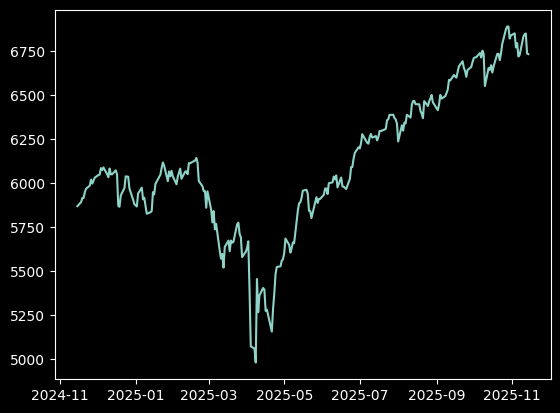

In [33]:
ticker = yf.Ticker("^SPX")
data = ticker.history(start="2024-11-15", 
end="2025-11-15", 
interval="1d", auto_adjust=False, 
actions=False)
print(data.tail())
dias = len(data)
print(dias, "numero de filas")
plt.plot(data['Adj Close'])


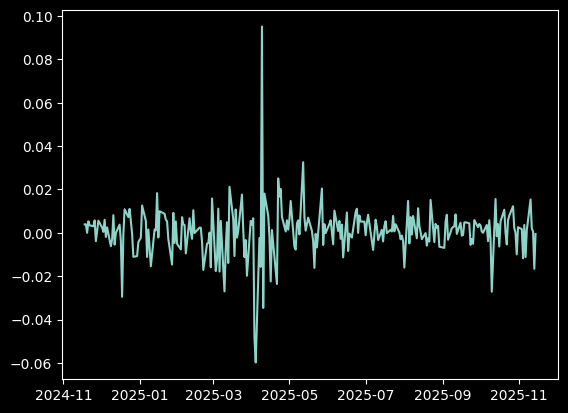

In [34]:
data["returns"]= data["Adj Close"].pct_change()
data["diff"]=data["Adj Close"].diff()
plt.plot(data["returns"])


In [41]:
mu = data['returns'].mean()
sigma = data['returns'].std()
S0 = data['Adj Close'].iloc[-1]
print("Mean:", mu)
print("Standard Deviation:", sigma)
print("Last Adjusted Close Price:", S0)

Mean: 0.0006210717765602047
Standard Deviation: 0.011882695337063735
Last Adjusted Close Price: 6734.10986328125


In [42]:
plt.style.use('dark_background')
n=dias
T=1
dt=T/n
M= dias
mu = mu*dias
sigma = sigma*np.sqrt(dias)
print("Mean:", mu)
print("Standard Deviation:", sigma)
print("Last Adjusted Close Price:", S0)

Mean: 0.15526794414005116
Standard Deviation: 0.18788191003491808
Last Adjusted Close Price: 6734.10986328125


In [43]:
St = np.exp((mu-1/2*sigma**2)*dt 
            +sigma*np.random.normal(0, np.sqrt(dt), (n,M)).T)
print(St)

St= np.vstack([np.ones(M), St])

St = S0* St.cumprod(axis=0)



[[0.993055   0.99338399 0.99645265 ... 0.99194991 1.01193134 1.01786337]
 [1.02200942 0.99866714 0.99959166 ... 1.003962   0.99712851 1.00157877]
 [1.00530556 0.98971835 0.98227347 ... 0.99701844 1.00126721 0.9970906 ]
 ...
 [0.99401023 1.00216124 0.99708822 ... 1.00435638 1.01073583 0.97855542]
 [1.00257066 0.9889291  1.01401735 ... 1.00202635 1.01368363 0.97500898]
 [1.01092247 1.00155299 1.024004   ... 0.99753576 1.01576921 1.00791961]]


In [44]:
time = np.linspace(0, T, n+1)

tt=np.full(shape = (M, n+1), fill_value = time).T

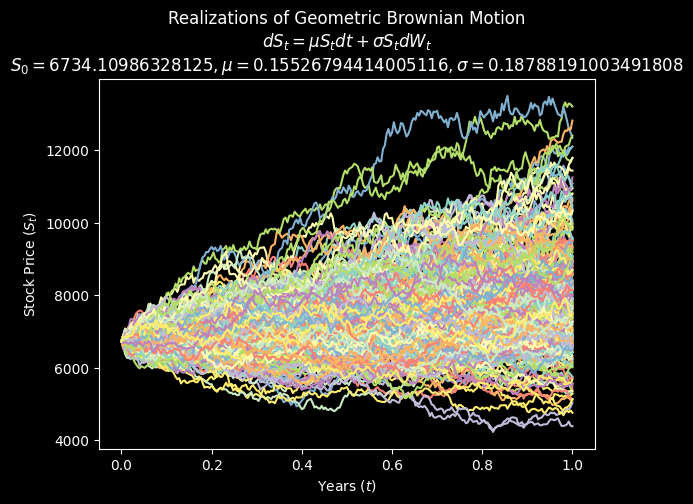

In [45]:
plt.style.use('dark_background')

plt.plot(tt, St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    f"Realizations of Geometric Brownian Motion\n"
    f"$dS_t = \mu S_t dt + \sigma S_t dW_t$\n"
    f"$S_0 = {S0}, \mu = {mu}, \sigma = {sigma}$"
)
plt.show()

In [46]:
# Precios finales de todas las simulaciones
precios_finales = St[-1, :]

# Retorno promedio anualizado
retorno_promedio = np.mean(precios_finales) / S0 - 1
retorno_anualizado = (1 + retorno_promedio)**(1/T) - 1

# Volatilidad (riesgo)
volatilidad = np.std(precios_finales) / S0

# Ratio de Sharpe (retorno/riesgo)
sharpe_ratio = retorno_anualizado / volatilidad

print(f"Retorno esperado: {retorno_anualizado:.2%}")
print(f"Volatilidad: {volatilidad:.2%}") 
print(f"Ratio de Sharpe: {sharpe_ratio:.2f}")

Retorno esperado: 18.43%
Volatilidad: 23.71%
Ratio de Sharpe: 0.78


In [48]:
# Calcular pérdidas
perdidas = S0 - precios_finales

# VaR al 95% de confianza (pérdida que no se supera el 95% del tiempo)
VaR_95 = np.percentile(perdidas, 95)
CVaR_95 = np.mean(perdidas[perdidas >= VaR_95])  # Pérdida promedio en el peor 5%

# VaR al 95% de confianza (pérdida que no se supera el 95% del tiempo)
VaR_95_per = VaR_95/S0
CVaR_95_per = CVaR_95/S0  # Pérdida promedio en el peor 5%

print(f"VaR 95%: ${VaR_95:.2f} (Pérdida máxima en 95% de casos)")
print(f"CVaR 95%: ${CVaR_95:.2f} (Pérdida promedio en el peor 5%)")
print(f"VaR 95%: {VaR_95_per:.2%} (Pérdida máxima en 95% de casos en porcentaje)")
print(f"CVaR 95%: {CVaR_95_per:.2%} (Pérdida promedio en el peor 5% en porcentaje)")

VaR 95%: $1173.56 (Pérdida máxima en 95% de casos)
CVaR 95%: $1554.89 (Pérdida promedio en el peor 5%)
VaR 95%: 17.43% (Pérdida máxima en 95% de casos en porcentaje)
CVaR 95%: 23.09% (Pérdida promedio en el peor 5% en porcentaje)


In [52]:
# Probabilidad de ganar dinero
prob_ganar = np.mean(precios_finales > S0) * 100

# Probabilidad de duplicar la inversión
prob_duplicar = np.mean(precios_finales > 2 * S0) * 100

# Probabilidad de perder más del 20%
prob_perder_4 = np.mean(precios_finales < 0.96 * S0) * 100

print(f"Probabilidad de ganar: {prob_ganar:.1f}%")
print(f"Probabilidad de duplicar: {prob_duplicar:.1f}%") 
print(f"Probabilidad de perder >4%: {prob_perder_4:.1f}%")

Probabilidad de ganar: 77.6%
Probabilidad de duplicar: 0.0%
Probabilidad de perder >4%: 14.4%


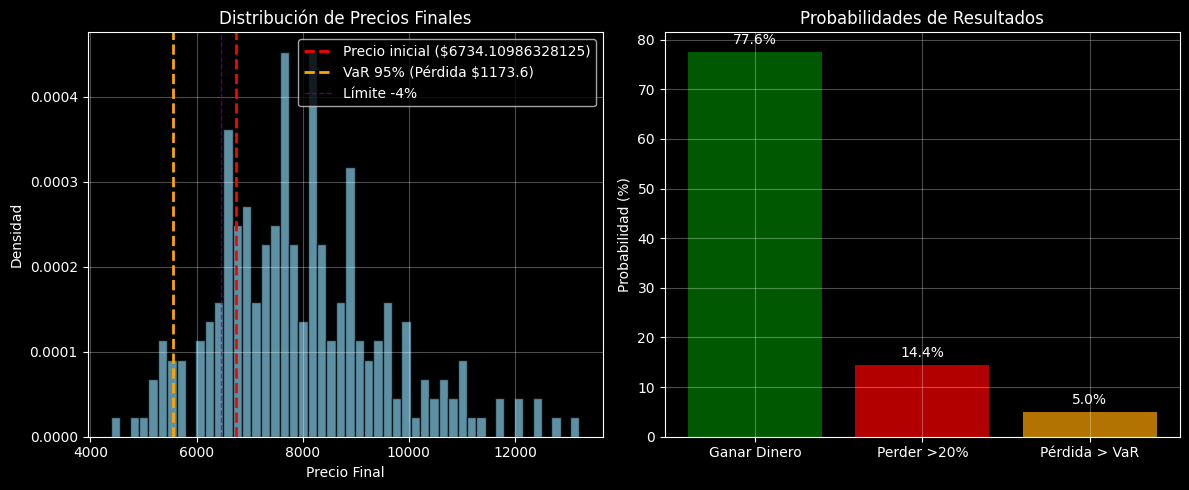

RESUMEN:
VaR 95%: $1173.56 (Pérdida máxima en 95% de casos)
Probabilidad de ganar: 77.6%
Probabilidad de perder >4%: 14.4%


In [56]:
# Calcular métricas con tu St
precios_finales = St[-1, :]  # Precios al final del periodo
VaR_95 = np.percentile(S0 - precios_finales, 95)
prob_ganar = np.mean(precios_finales > S0) * 100
prob_perder_4 = np.mean(precios_finales < 0.96 * S0) * 100

# Crear gráfico
plt.figure(figsize=(12, 5))

# Gráfico 1: Distribución de precios finales
plt.subplot(1, 2, 1)
plt.hist(precios_finales, bins=50, alpha=0.7, color='skyblue', edgecolor='black', density=True)
plt.axvline(S0, color='red', linestyle='--', linewidth=2, label=f'Precio inicial (${S0})')
plt.axvline(S0 - VaR_95, color='orange', linestyle='--', linewidth=2, 
            label=f'VaR 95% (Pérdida ${VaR_95:.1f})')
plt.axvline(0.96 * S0, color='purple', linestyle='--', linewidth=1, 
            label='Límite -4%', alpha=0.7)
plt.xlabel('Precio Final')
plt.ylabel('Densidad')
plt.title('Distribución de Precios Finales')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Probabilidades
plt.subplot(1, 2, 2)
categorias = ['Ganar Dinero', 'Perder >20%', 'Pérdida > VaR']
probabilidades = [prob_ganar, prob_perder_4, 5]  # VaR 96% = 4% de casos
colores = ['green', 'red', 'orange']

bars = plt.bar(categorias, probabilidades, color=colores, alpha=0.7)
plt.ylabel('Probabilidad (%)')
plt.title('Probabilidades de Resultados')
plt.grid(True, alpha=0.3)

# Añadir valores en las barras
for bar, prob in zip(bars, probabilidades):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{prob:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"RESUMEN:")
print(f"VaR 95%: ${VaR_95:.2f} (Pérdida máxima en 95% de casos)")
print(f"Probabilidad de ganar: {prob_ganar:.1f}%")
print(f"Probabilidad de perder >4%: {prob_perder_4:.1f}%")

# Análisis 
El análisis realizado a través del modelo de Movimiento Browniano Geométrico (GBM) indica que el S&P 500 podría presentar una rentabilidad efectiva de aproximadamente 18% en un año, considerando el efecto de la volatilidad.

Por otro lado, la relación beneficio-riesgo, medida a través del Sharpe Ratio, arroja un valor de 0,78, lo que indica un nivel de riesgo aceptable para los inversores.

Además, se puede afirmar que con un 95% de confianza, la cotización no bajará por debajo de $1,173.6, lo que aporta un nivel de seguridad significativo para quienes invierten en activos representativos del S&P 500.

Sin embargo, es importante destacar que este análisis no debe ser considerado como el único criterio para la toma de decisiones de inversión. Otros factores, como la composición sectorial del índice y el contexto macroeconómico, también deben ser evaluados, dado que existe un 5% de probabilidad de que las pérdidas superen los niveles estimados.